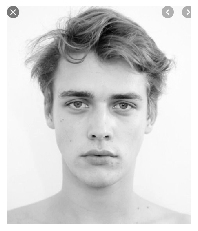

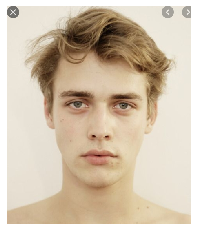

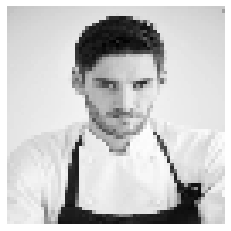

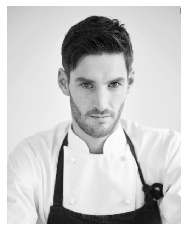

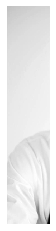

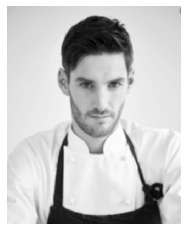

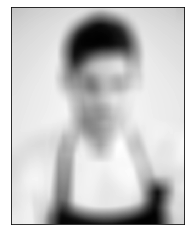

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

#흑백
image = cv2.imread("image/Person/test2.jpg", cv2.IMREAD_GRAYSCALE)
plt.imshow(image, cmap="gray"), plt.axis("off") # 축제거
plt.show()

#print(image)
#print(image.shape)

#컬러
image_bgr = cv2.imread("image/Person/test2.jpg", cv2.IMREAD_COLOR)
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB) #opencv는 기본적으로 bgr을 사용하기에 rgb로 바꿔야함.
plt.imshow(image_rgb), plt.axis("off") # 축제거
plt.show()

#이미지저장   !!주의 동일 이름이 있을 시에 파일을 덮어버림
#path = "image/Person/"
#name = input("파일 이름 입력: ")
#extention = input("확장자 입력")
#cv2.imwrite(path + name + "." + extention, image)

#사이즈 재조정
image_2 = cv2.imread("image/Person/test3.jpg", cv2.IMREAD_GRAYSCALE)
image_50x50 = cv2.resize(image_2, (64,64))
plt.imshow(image_50x50, cmap="gray"), plt.axis("off")
plt.show()

#이미지 주변 제거
image_cropped = image_2[:,:120]
plt.imshow(image_2, cmap="gray"), plt.axis("off")
plt.show()
plt.imshow(image_cropped, cmap="gray"), plt.axis("off")
plt.show()

#이미지 흐리게하기
image_blurry = cv2.blur(image_2, (5,5))
plt.imshow(image_blurry, cmap="gray"), plt.axis("off")
plt.show()
image_blurry = cv2.blur(image_2, (50,50))
plt.imshow(image_blurry, cmap="gray"), plt.xticks([]), plt.yticks([]) #틱 생성
plt.show()

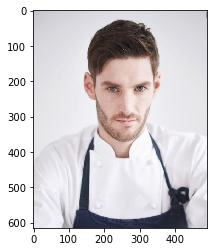

(위)기본 이미지
(아래)변형된 이미지


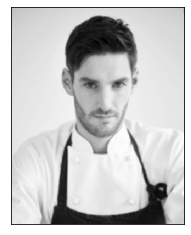

이미지 흐리게 하기


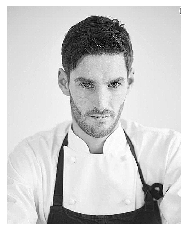

이미지 강조


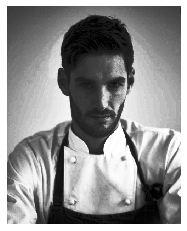

흑백 이미지 대비 높이기


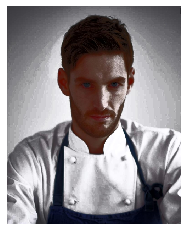

컬러 이미지 대비 높이기


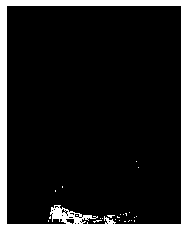

색깔구분에 사용되는 마스크(흑백 버전)


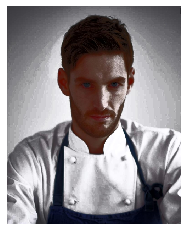

이미지 색깔 구분하기(대비와 비슷)


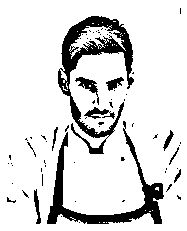

이미지 이진화


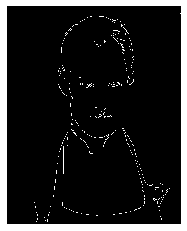

경계값 감지


In [25]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

image = cv2.imread("image/Person/test3.jpg", cv2.IMREAD_GRAYSCALE)
image_bgr = cv2.imread("image/Person/test3.jpg")
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.show()
print("(위)기본 이미지\n(아래)변형된 이미지")

#커널 생성(이미지 흐리게 하기 <- 그냥 예시) !!주의 커널은 매우 중요한 개념인듯 하자 이해하고 넘어가자 https://setosa.io/ev/image-kernels/
kernel = np.ones((5,5)) / 25.0
image_kernel = cv2.filter2D(image, -1, kernel) # 두번째 매개변수인 -1은 픽셀값의 범위를 지정하느 것으로 -1이면 입력과 동일한 범위를 유지한다.
plt.imshow(image_kernel, cmap="gray"), plt.xticks([]), plt.yticks([]) #tick은 사진에 있는 좌표 표시부분을 말하는거 같음( 내 생각 )
plt.show()
print("이미지 흐리게 하기")

#커널 생성(강조)
kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
image_sharp = cv2.filter2D(image, -1, kernel)
plt.imshow(image_sharp, cmap = "gray"), plt.axis("off")
plt.show()
print("이미지 강조")

#이미지 대비 높이기 OpenCV의 equalizeHist 함수를 사용
image_enhanced = cv2.equalizeHist(image)
plt.imshow(image_enhanced, cmap = "gray"), plt.axis("off")
plt.show()
print("흑백 이미지 대비 높이기")

#컬러 이미지 대비 높이기
image_yuv = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2YUV) ## 이미지 대비를 높이기 위해서 히스토그램 평활화를 하는데 먼저 yuv로 변경 후 
image_yuv[:,:,0] = cv2.equalizeHist(image_yuv[:,:,0])   # equalizeHist를 진행하고 다시 rgb로 바꾸고 출력한다
image_rgb = cv2.cvtColor(image_yuv, cv2.COLOR_YUV2RGB)  # y는 밝기 이고 u,v는 색상을 뜻한다.
plt.imshow(image_rgb), plt.axis("off")                  # 이는 관심 대상을 다른 객체나 배경과 잘 구분되도록 만들어 줌(항상 그런것은 아님)
plt.show()
print("컬러 이미지 대비 높이기")

#이미지 색깔 구분하기
image_hsv = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2HSV)              ## hsv(색상, 채도, 명도)로 변경 후 격리시킬 값의 범위를 결정
lower_blue = np.array([50,100,50])                                   # hsv에서 파랑값의 범위를 정의함  
upper_blue = np.array([130,255,255])                              
mask = cv2.inRange(image_hsv, lower_blue, upper_blue)                # 이미지에 적용할 마스크를 만듬

plt.imshow(mask, cmap='gray'), plt.axis("off")
plt.show()
print("색깔구분에 사용되는 마스크(흑백 버전)")

image_bgr_masked = cv2.bitwise_and(image_bgr, image_bgr, mask=mask)  # bitwise_and 함수를 사용하여 이미지에 마스크를 적용
image_rgv = cv2.cvtColor(image_bgr_masked, cv2.COLOR_BGR2RGB)        # rgb로 이미지 포맷 후 출력
plt.imshow(image_rgb), plt.axis("off")
plt.show()
print("이미지 색깔 구분하기(대비와 비슷)")

##이미지 이진화하기(이미지를 단순한버전으로 출력해야 할 때, 이미지 안의 영역마다 빛 조건이 달라질 때 도움이 됨) - 적응적 이진화 적용
 #장점은 중요한 요소를 유지하면서 이미지의 노이즈를 제거하는 것.
image_gray = cv2.imread("image/Person/test3.jpg", cv2.IMREAD_GRAYSCALE) ## 어떤 값보다 큰 값을 가진  픽셀을 흰색으로 만들고 작은 값을
                                                                         # 가진 픽셀은 검은색으로 만드는과정 더 고급 기술(적응적 이진화)
                                                                         # 은 임계값 주변의 픽셀의 강도에 의해 결정됨
max_output_value = 255                                                   # 출력 픽셀 강도의 최대값을 결정
neighborhood_size = 99                                                   # 블록 크기(임계값 결정에 사용하는 주변 영역 크기)
subtract_from_mean = 10                                                  # 계산된 임곗값에서뺄 상수(임곗값을 수동으로 미세조정하는데 사용)
image_binarized = cv2.adaptiveThreshold(image_gray, 
                                        max_output_value, 
                                        cv2.ADAPTIVE_THRESH_GAUSSIAN_C,  # 픽셀의 임계값을 주변 픽셀 강도의 가중치 합으로 설정함.
                                        cv2.THRESH_BINARY,
                                        neighborhood_size,
                                        subtract_from_mean)
plt.imshow(image_binarized, cmap="gray"), plt.axis("off")
plt.show()
print("이미지 이진화")

#배경 제거하기 - 사진 자료가 달라 잘 실행되지 않음(쿡북 8.10 참고)

#경계선 감지하기(캐니 경계선 감지기 사용)
median_intensity = np.median(image_gray)                             #픽셀 강도의 중간값을 계산함
lower_threshold = int(max(0, (1.0 - 0.33) * median_intensity))       #임계값의 저점과 고점, Canny를 전체 이미지 모음에 적용하기 위해서
upper_threshold = int(min(255, (1.0 + 0.33) * median_intensity))     #몇 개의 이미지를 테스트하여 낮은 임계값과 높은 임계값의 적절한 쌍을 찾는 것이 좋은 결과를 만듬.
image_canny = cv2.Canny(image_gray, lower_threshold, upper_threshold)
plt.imshow(image_canny, cmap ="gray"), plt.axis("off")
plt.show()
print("경계값 감지")